## Данные

В этой лабораторной работе будем работать с [датасетом](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset), предназначенным для обучения алгоритма рекомендаций книг.

Для рекомендаций нам понадобятся таблицы `Books.csv` и `Ratings.scv`. Файл с рейтингами можно найти в папке с лабораторной работой на гитхабе. Файл с описаниями книг слишком большой, поэтому он располагается только по ссылке:
1. Файл с рейтингами (такой же, как в гитхабе): https://drive.google.com/file/d/1Hliaee7Y584-7lMoGeGjGabRRubzdoYn/view?usp=sharing
2. Файл с книгами:  https://drive.google.com/file/d/1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy/view?usp=sharing

In [1]:
import pandas as pd

In [2]:
!gdown 1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
!gdown 1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy

Downloading...
From: https://drive.google.com/uc?id=1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
To: /content/Ratings.csv
100% 22.6M/22.6M [00:00<00:00, 87.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy
To: /content/Books.csv
100% 73.3M/73.3M [00:00<00:00, 93.1MB/s]




```
# Выбран кодовый формат
```

Посмотрим на таблицу `Ratings`.

In [21]:
ratings = pd.read_csv("Ratings.csv")
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,1149780.0,140386.395126,80562.277718,2.0,70345.0,141010.0,211028.0,278854.0
Book-Rating,1149780.0,2.866950,3.854184,0.0,0.0,0.0,7.0,10.0


Как распределяются рейтинги?

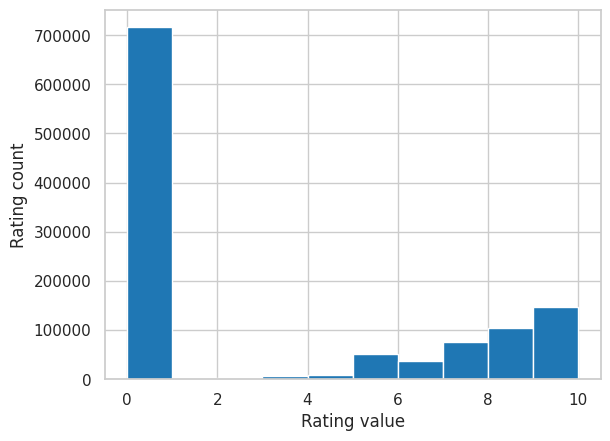

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")
sns.set_style("whitegrid")

ratings["Book-Rating"].hist()
plt.xlabel("Rating value")
plt.ylabel("Rating count")
plt.show()


Теперь посмотрим на таблицу `Books`.

In [22]:
books = pd.read_csv("Books.csv")
books.head()

<ipython-input-22-7dc4eb500039>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


- Есть немножко пропусков.
- Проверим уязвимую часть данных – года – на адекватность.

In [ ]:
books["Year-Of-Publication"].value_counts().sort_values(ascending=True)[:10]

,count
Year-Of-Publication,
2037,1
2011,1
2038,1
1938,1
1906,1
1919,1
1926,1
1926,1
2008,1


Есть года, которые еще не наступили...

Проверим, есть ли строковые данные в столбце с годом (потому что `info()` назвал тип данных столбца `object`).

In [ ]:
books[books["Year-Of-Publication"].map(str).str.match("[^0-9]")]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


В трех строках пропущен автор, из-за чего смещены данные. Автор либо пропущен, либо склеен с названием. Надо проверить.

В сводке написано, что часть авторов и издателей провущена. Проверим, так ли это.

In [ ]:
books[(books["Book-Author"].isnull()) | (books["Publisher"].isnull())]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


Да, это так. Основные проблемы с данными выявили. Пора их исправлять и приступать к созданию рекомендаций.

## План анализа данных

1. Обработать данные, т.к. в данных есть несколько небольших проблем:
  1. В паре строк в таблице `Books.scv` значения столбцов сдвинуты вправо, а еще есть года, которые еще не наступили.
  2. В нескольких строках в таблице `Books.scv` есть пропуски, а также для рекомендаций в рамках лабораторной не понадобятся ссылки на картинки с обложкой.
  3. Не будем использовать для обучения записи с рейтинг равным 0 из таблицы `Ratings.scv`. Считаем, что 0 означает, что пользователь еще не оценивал книгу, но проявил к ней какой-то интерес.
  4. Не будем использовать для обучения алгоритмов те книги, которым оценка поставлена всего 1 раз. Пользователей, оценивших всего одну книгу тоже брать в расчет не будем (хотя это на самом деле будет не сильно сказываться на обобщающей способности алгоритмов, можете сами проверить).
  5. Пункты 1-4 необходимы и достаточны для выполнения всех задач. Но можно сделать более глубокую обработку.
2. Обучить [SVD](https://surprise.readthedocs.io/en/stable/getting_started.html) на следующих записях: у книги есть хотя бы одна оценка, пользователь оценил хотя бы одну книгу.
   - МАЕ должно быть ниже 1.3 (для этого есть тест)
   - **Сохранить модель.**
3. Научить линейную регрессию ([SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)) предсказывать средний рейтинг книги по следующим столбцам: автор, издатель, год издания, векторизованное название (для векторизации можно использовать [tf-idf](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting), [word2vec](https://radimrehurek.com/gensim/models/word2vec.html) или более сложный алгоритм. Для достижения требуемой тестом точности достаточно будет tf-idf. Собрав полностью датасет, не забудьте нормализовать данные ([StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)).
   - МАЕ должно быть ниже 1.5 (для этого есть тест)
   - **Сохранить модель.**
4. В файле `personal_recommendation.py` создайте рекомендацию для пользователя, у которого в исходном датасете было больше всего 0 среди рейтингов книг.
   Алгоритм такой:
   1. Находим нужного пользователя.
   2. Делаем предсказание SVD для книг, которым он "поставил" 0.
   3. Берем те книги, для которых предсказали рейтинг не ниже 8. Считаем, что 8 означет, что книга ему точно понравится.
   4. Делаем предсказание LinReg для этих же книг.
   5. Сортируем полученный на шаге 3 список по убыванию рейтинга линейной модели.
   6. В конце файла комментарием записываем полученную рекомендацию.

- То есть идея в том, чтобы сделать для пользователя индивидуальную рекомендацию, показывая в начале списка те книги, которые в целом могли бы иметь высокий рейтинг.
- Обязательно сохраняйте готовую модель и добавляйте ее в свой репозиторий, потому что файл с сохраненной моделью используется в тестах.

## Куда сдавать?

По инструкции в гитхаб – https://shy-question-39d.notion.site/1150ea832e418032bfc3d3e827c380fb?pvs=74

- К этой работе есть два теста – на качество получившихся моделей.
- Пул-реквест нужно сделать в ветку `lab2`.
- Можно загрузить в гитхаб файлы с реализацией по шаблону (шаблон можно дополнять и изменять под себя) или подготовить колаб с решением. Главное – сохранить модели, тесты проверяют их.

> Будьте внимательны! На гитхабе в ветке `main` обновился файл `pyad.yml`.

**Устная защита работ не требуется, но вам могут быть заданы вопросы прямо в вашем пул-реквесте!**

In [8]:
import numpy as np

Исправляем датафрейм с книгами:

In [23]:
def fix_shifted_row(row, start_col, columns):
    """Фиксирует строки, где данные сдвинуты вправо."""
    for idx in range(len(columns) - 1, start_col, -1):
        row[columns[idx]] = row[columns[idx - 1]]
    row[columns[start_col]] = np.nan
    return row

# Находим строки, где год публикации некорректен (не является числом)
shifted_rows = books["Year-Of-Publication"].apply(lambda x: not str(x).isdigit())

# Исправляем сдвинутые строки
columns = books.columns.tolist()
start_col = columns.index("Book-Author")
books.loc[shifted_rows, :] = books.loc[shifted_rows].apply(
    fix_shifted_row, axis=1, start_col=start_col, columns=columns
)

# Преобразуем столбец "Year-Of-Publication" в числовой формат и убираем будущие года
current_year = pd.Timestamp.now().year
books["Year-Of-Publication"] = pd.to_numeric(books["Year-Of-Publication"], errors="coerce")
books = books[books["Year-Of-Publication"].le(current_year)]

# Заполняем пропуски в данных (например, пустые строки заменяем на "Unknown")
books.fillna({
    "Book-Title": "Unknown",
    "Book-Author": "Unknown",
    "Publisher": "Unknown"
}, inplace=True)

# Удаляем колонки с ссылками на изображения
books = books.drop(columns=["Image-URL-S", "Image-URL-M", "Image-URL-L"], errors="ignore")

Обратываем датафрейм рейтингов

In [24]:
# Убираем записи с рейтингом 0
ratings = ratings[ratings["Book-Rating"] > 0].copy()

# Убираем книги, которым поставили рейтинг только один раз
book_rating_counts = ratings["ISBN"].value_counts()
valid_books = book_rating_counts[book_rating_counts > 1].index
ratings = ratings[ratings["ISBN"].isin(valid_books)]

# Убираем пользователей, которые оценили только одну книгу
user_rating_counts = ratings["User-ID"].value_counts()
valid_users = user_rating_counts[user_rating_counts > 1].index
ratings = ratings[ratings["User-ID"].isin(valid_users)]

Обратока названий:

In [13]:
!pip install nltk

In [17]:
def normalize_book_titles(title: str) -> str:
    """Функция для нормализации текстовых данных в столбце Book-Title:
    - токенизация
    - удаление стоп-слов
    - удаление пунктуации
    Опционально можно убрать шаги или добавить дополнительные.
    """
    import string
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    import nltk

    # Токенизация
    tokens = word_tokenize(title)

    # Удаление пунктуации
    tokens = [word for word in tokens if word not in string.punctuation]

    # Удаление стоп-слов
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    return " ".join(tokens)

# Применяем нормализацию к столбцу Book-Title
books["Book-Title"] = books["Book-Title"].apply(normalize_book_titles)

Теперь данные готовы!

Обучение модели SVD для рекомендаций:
Для этого будет использовать библиотеку ```surprise```

In [18]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357283 sha256=165c83f17f03b16b3236038523945935ff9df3be7e60044ec9d3924011a0cd23
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [26]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise.accuracy import mae
import pickle

# Создаем объект Reader для данных
reader = Reader(rating_scale=(1, 10))

# Загружаем данные из DataFrame
ratings_data = Dataset.load_from_df(ratings[["User-ID", "ISBN", "Book-Rating"]], reader)

# Разделяем данные на обучающую и тестовую выборки
train_data, test_data = train_test_split(ratings_data, test_size=0.2, random_state=42)

# Создаем и обучаем модель SVD
model = SVD(random_state=42)
model.fit(train_data)

# Оцениваем модель на тестовой выборке
predictions = model.test(test_data)
mean_absolute_error = mae(predictions)

# Выводим результат
print(f"Средняя абсолютная ошибка (MAE): {mean_absolute_error:.4f}")

if mean_absolute_error < 1.5:
  with open("svd.pkl", "wb") as file:
    pickle.dump(model, file)

MAE:  1.2546
Средняя абсолютная ошибка (MAE): 1.2546


Обучение линейной регрессии:

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error

# Рассчитываем средний рейтинг для каждой книги
book_avg_rating = ratings.groupby("ISBN")["Book-Rating"].mean().reset_index()
book_avg_rating.rename(columns={"Book-Rating": "Average-Rating"}, inplace=True)

# Объединяем данные книг с рассчитанным средним рейтингом
data = books.merge(book_avg_rating, on="ISBN", how="inner")

# Убираем строки с отсутствующими значениями среднего рейтинга
data.dropna(subset=["Average-Rating"], inplace=True)

# Выделяем признаки и целевую переменную
features = data[["Book-Title", "Book-Author", "Publisher", "Year-Of-Publication"]]
labels = data["Average-Rating"]

# Настраиваем преобразование текста в числовой формат
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Настраиваем обработку категориальных и числовых данных
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

# Создаем общий препроцессор для всех типов данных
preprocessor = ColumnTransformer(transformers=[
    ("title", tfidf_vectorizer, "Book-Title"),
    ("author", categorical_transformer, ["Book-Author"]),
    ("publisher", categorical_transformer, ["Publisher"]),
    ("year", numerical_transformer, ["Year-Of-Publication"])
])

# Создаем конвейер с препроцессором и регрессором
linear_regression_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", SGDRegressor(random_state=42, max_iter=1000, tol=1e-3))
])

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Обучаем модель линейной регрессии
linear_regression_pipeline.fit(X_train, y_train)

# Предсказываем значения для тестовой выборки
predictions = linear_regression_pipeline.predict(X_test)

# Рассчитываем среднюю абсолютную ошибку (MAE)
mae_score = mean_absolute_error(y_test, predictions)
print(f"Средняя абсолютная ошибка (MAE): {mae_score:.4f}")

if mae_score < 1.3:
  with open("linreg.pkl", "wb") as file:
    pickle.dump(linear_regression_pipeline, file)

Средняя абсолютная ошибка (MAE): 0.9982


Персональная рекомендация:

In [31]:
import pandas as pd
import joblib
from surprise import Reader, Dataset

# Загружаем данные
ratings_full = pd.read_csv("Ratings.csv")
svd_model = joblib.load("svd.pkl")
linreg_model = joblib.load("linreg.pkl")
books_data = pd.read_csv("Books.csv")

# Находим пользователя с наибольшим количеством оценок 0
zero_ratings = ratings_full[ratings_full["Book-Rating"] == 0].groupby("User-ID")["Book-Rating"].count()
user_with_most_zero_ratings = zero_ratings.idxmax()

# Получаем список ISBN книг с рейтингом 0 для этого пользователя
zero_rated_books = ratings_full[
    (ratings_full["User-ID"] == user_with_most_zero_ratings) &
    (ratings_full["Book-Rating"] == 0)
]["ISBN"].unique()

# Формируем тестовый набор для модели SVD
test_data = [(user_with_most_zero_ratings, isbn, 0) for isbn in zero_rated_books]
predictions_svd = svd_model.test(test_data)

# Отбираем книги с прогнозируемым рейтингом >= 8
selected_books = [pred.iid for pred in predictions_svd if pred.est >= 8]

# Извлекаем данные по выбранным книгам
selected_books_data = books_data[books_data["ISBN"].isin(selected_books)].copy()

# Формируем признаки для линейной регрессии
X_selected_books = selected_books_data[["Book-Title", "Book-Author", "Publisher", "Year-Of-Publication"]]
predicted_ratings = linreg_model.predict(X_selected_books)

# Добавляем прогнозируемый рейтинг в DataFrame
selected_books_data["Predicted-Mean-Rating"] = predicted_ratings
selected_books_data.sort_values("Predicted-Mean-Rating", ascending=False, inplace=True)

# Отбираем топ-10 книг для рекомендации
top_recommendations = selected_books_data[["ISBN", "Book-Title", "Book-Author", "Predicted-Mean-Rating"]].head(10)

# Формируем таблицу предсказаний SVD
svd_predictions_table = pd.DataFrame(
    {
        "User-ID": [pred.uid for pred in predictions_svd if pred.iid in selected_books],
        "ISBN": [pred.iid for pred in predictions_svd if pred.iid in selected_books],
        "SVD_Predicted_Rating": [pred.est for pred in predictions_svd if pred.iid in selected_books]
    }
)

print("=== Прогнозы модели SVD ===")
print(svd_predictions_table.to_string(index=False))

print("\n=== Топ-10 рекомендованных книг ===")
print(top_recommendations.to_string(index=False))

<ipython-input-31-654b90953915>:9: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_data = pd.read_csv("Books.csv")


=== Прогнозы модели SVD ===
 User-ID       ISBN  SVD_Predicted_Rating
  198711 0060508302              8.139897
  198711 0060915544              8.058368
  198711 0064400042              8.527617
  198711 0064400557              8.185512
  198711 0064401847              8.145014
  198711 0064405052              8.058328
  198711 0064409422              8.237724
  198711 0064471101              8.313481
  198711 0307010856              8.180968
  198711 0312950586              8.013859
  198711 0345313860              8.203989
  198711 0345337662              8.083213
  198711 0345361792              8.001138
  198711 0380698714              8.060806
  198711 0393307050              8.031921
  198711 0394820371              8.264787
  198711 0394829204              8.079508
  198711 0425109720              8.069183
  198711 0439064872              8.465527
  198711 0440219078              8.107157
  198711 0440223202              8.129122
  198711 0440235502              8.128930
  1987